In [93]:
# Business Understanding:Airbnb Seattle
# Exercise to answer below questions
# 1.  What is the Airbnb price trend throughout the year?
# 2.  What are the most available accomodation types?
# 3.  which neighborhood's are reviewed high by the customers and which are not popular?
# 4.  What are the most common amenities in the listings?

In [94]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.preprocessing import MultiLabelBinarizer

In [95]:
# Data understanding: Gather the data from 3 files and analyze the files.

In [97]:
#Load data
listings = pd.read_csv("C:/Nano Degree/Data Science/Input/listings.csv")
calendar = pd.read_csv("C:/Nano Degree/Data Science/Input/calendar.csv")
reviews = pd.read_csv("C:/Nano Degree/Data Science/Input/reviews.csv")

# gather file info
print(listings.shape)
listings.head()
print("\n")
print(calendar.shape)
print("\n")
print(reviews.shape)

(3818, 92)


(1393570, 4)


(84849, 6)


In [98]:
# Data Preperation

In [99]:
# 1. Calendar dataset
print(calendar.info())
# Price and date columns are object types.
# '$' needs to be removed from price and converted to float.
calendar["price"] = calendar["price"].replace('[\$.,]', '', regex=True).astype(float)
calendar.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB
None


,listing_id,date,available,price
0,241032,2016-01-04,t,8500.0
1,241032,2016-01-05,t,8500.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [100]:
# date column to be converted to proper datatype and format
calendar['date'] = pd.to_datetime(calendar['date'])
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null datetime64[ns]
available     1393570 non-null object
price         934542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 42.5+ MB


In [101]:
# available column has 2 values
calendar.available.unique()


array(['t', 'f'], dtype=object)

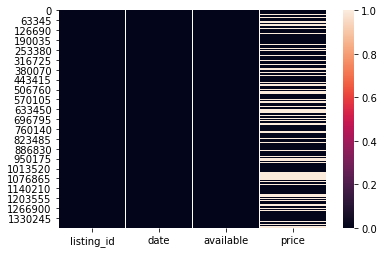

In [102]:
# using heatmap to see the null values.
# looks like there are null values in the price column. other columns seem to be good. 
sns.heatmap(calendar.isnull())

In [103]:
#2. Listings Dataset
listings.info()
# dataset has 3818 listings


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [104]:
# cleansing the data
# removing nulls
print(set(listings.columns[listings.isnull().mean()>= 0.50])) # checking for columns where nulls are over 50%

{'license', 'square_feet', 'monthly_price', 'security_deposit'}


In [105]:
listings.drop(columns=['license', 'monthly_price', 'square_feet', 'security_deposit'],inplace=True)


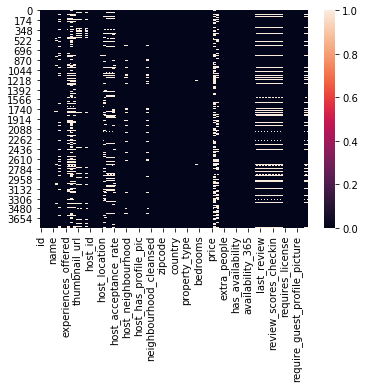

In [106]:
sns.heatmap(listings.isnull())

In [107]:
listings.columns[listings.isnull().sum()/listings.shape[0]*100>25] # columns with more than 25 % values missing




Index(['neighborhood_overview', 'notes', 'weekly_price', 'cleaning_fee'], dtype='object')

In [108]:
# dropping earlier columns, url related columns, redundant data columns, one value data columns
listings=listings.drop(['neighborhood_overview', 'notes', 'weekly_price', 'cleaning_fee','picture_url','thumbnail_url','medium_url','host_thumbnail_url','picture_url','xl_picture_url',
                        'host_url','xl_picture_url','host_picture_url','listing_url','state','market','smart_location','country_code','country','calendar_last_scraped','last_scraped',
                        'space','summary','experiences_offered','description','transit','host_about'],axis=1)

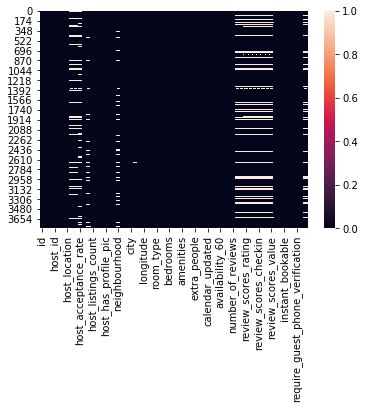

In [110]:
sns.heatmap(listings.isnull())
# chart improved from dropping columns

In [111]:
# datasets is prepared now for the evaluation

In [112]:
# Data Modeling/Evaluation

In [113]:
# 1. What is the Airbnb price trend throughout the year?

In [114]:
# add month and year column to the calender dataset
calendar['month'], calendar['year'] = calendar.date.dt.month, calendar.date.dt.year
calendar.info(verbose=True, null_counts=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 6 columns):
listing_id    1393570 non-null int64
date          1393570 non-null datetime64[ns]
available     1393570 non-null object
price         934542 non-null float64
month         1393570 non-null int64
year          1393570 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 63.8+ MB


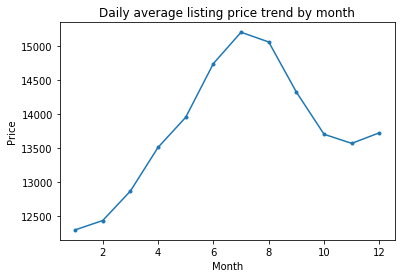

In [115]:
average_daily_price = calendar.dropna().groupby('month')['price'].mean().reset_index()
plt.title("Daily average listing price trend by month")
plt.plot(average_daily_price.month, average_daily_price.price, marker='.')
plt.xlabel("Month")
plt.ylabel("Price");

In [116]:
# based on the chart, there are lower prices in first few months and 
# then there is spike at mid year. Prices lower from august to rise again during end of year

In [117]:
# 2.  What are the most available accomodation types?

In [118]:
listings['property_type'] = listings['property_type'].fillna(listings['property_type'].mode()[0]) 

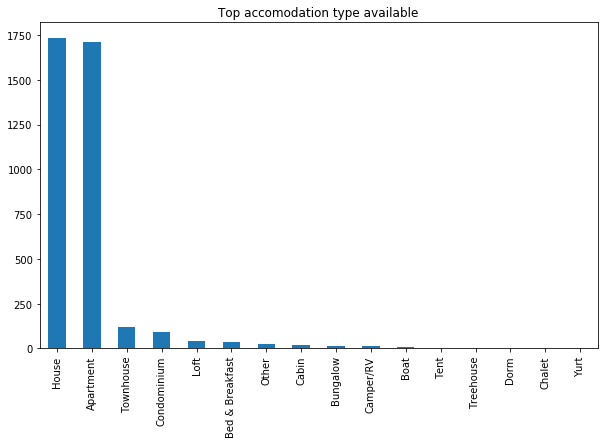

In [119]:
property_type = listings['property_type'].value_counts()
(property_type).plot(kind='bar',figsize=(10,6))
plt.title("Top accomodation type available");

In [120]:
# from the visual, its clear that accomodation type is dominated by Houses and Apartments.
# House and apartments occupy 90 % of the total listings

In [121]:
# 3.  which neighborhood's are reviewed high by the customers and which are not popular?

In [122]:
listings.neighbourhood_cleansed.unique()

array(['West Queen Anne', 'Adams', 'West Woodland', 'East Queen Anne',
       'Wallingford', 'North Queen Anne', 'Green Lake', 'Westlake',
       'Mann', 'Madrona', 'University District', 'Harrison/Denny-Blaine',
       'Minor', 'Leschi', 'Atlantic', 'Pike-Market', 'Eastlake',
       'South Lake Union', 'Lawton Park', 'Briarcliff', 'Belltown',
       'International District', 'Central Business District',
       'First Hill', 'Yesler Terrace', 'Pioneer Square', 'Gatewood',
       'Arbor Heights', 'Alki', 'North Admiral', 'Crown Hill',
       'Fairmount Park', 'Genesee', 'Interbay', 'Industrial District',
       'Mid-Beacon Hill', 'South Beacon Hill', 'Greenwood', 'Holly Park',
       'Fauntleroy', 'North Beacon Hill', 'Mount Baker', 'Brighton',
       'South Delridge', 'View Ridge', 'Dunlap', 'Rainier Beach',
       'Columbia City', 'Seward Park', 'North Delridge', 'Maple Leaf',
       'Ravenna', 'Riverview', 'Portage Bay', 'Bryant', 'Montlake',
       'Broadway', 'Loyal Heights', 'Vict

In [123]:
listings['review_scores_rating'].fillna(listings['review_scores_rating'].mean(), inplace=True)

In [124]:
neighbourhood_by_rating= listings.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().reset_index().set_index('neighbourhood_cleansed').sort_values('review_scores_rating', ascending=False)
print("Top 5 Neighbourhoods by review score rating")
print("-------------------------------------------")
print(neighbourhood_by_rating.head(5))
print("\n")
print("Bottom 5 Neighbourhoods by review score rating")
print("-------------------------------------------")
print(neighbourhood_by_rating.tail(5))

Top 5 Neighbourhoods by review score rating
-------------------------------------------
                        review_scores_rating
neighbourhood_cleansed                      
Riverview                          97.250000
Southeast Magnolia                 96.742223
Harrison/Denny-Blaine              96.719895
Madrona                            96.718613
Genesee                            96.651678


Bottom 5 Neighbourhoods by review score rating
-------------------------------------------
                        review_scores_rating
neighbourhood_cleansed                      
South Lake Union                   91.900522
Ravenna                            91.880752
View Ridge                         90.791323
University District                89.737876
Pinehurst                          89.250000


In [125]:
# from the analysis above, Neighbourhoods Riverview, Southeast Magnolia,Harrison/Denny-Blaine,Madrona,Genesee has good ratings review by customers
# South Lake Union,Ravenna,View Ridge,University District,Pinehurst neigbourhoods were given low rating. This can be a factor while customers chosing airbnb.

In [126]:
# 4.  What are the most common amenities in the listings?

In [127]:
# first step is to make a list of all ameneties
def string2list(text):
    s = text.split(",")
    l = [i.translate(str.maketrans('', '', string.punctuation)) for i in s]
    return l

In [128]:
listings['amenities']=listings['amenities'].apply(string2list)
listings['amenities']

0       [TV, Cable TV, Internet, Wireless Internet, Ai...
1       [TV, Internet, Wireless Internet, Kitchen, Fre...
2       [TV, Cable TV, Internet, Wireless Internet, Ai...
3       [Internet, Wireless Internet, Kitchen, Indoor ...
4       [TV, Cable TV, Internet, Wireless Internet, Ki...
5       [Wireless Internet, Free Parking on Premises, ...
6       [Wireless Internet, Free Parking on Premises, ...
7       [Wireless Internet, Pets live on this property...
8       [TV, Cable TV, Internet, Wireless Internet, Ki...
9       [TV, Internet, Wireless Internet, Kitchen, Fre...
10      [TV, Cable TV, Internet, Wireless Internet, Ki...
11      [TV, Cable TV, Wireless Internet, Kitchen, Fre...
12      [TV, Cable TV, Internet, Wireless Internet, Ki...
13      [TV, Cable TV, Internet, Wireless Internet, Ki...
14      [TV, Cable TV, Internet, Wireless Internet, Ki...
15      [TV, Cable TV, Internet, Kitchen, Free Parking...
16      [Internet, Wireless Internet, Pets Allowed, Br...
17      [Wirel

In [129]:
#next step is to prepare individual amenities
# Referred to examples from  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html for r
mlb = MultiLabelBinarizer()
listameneties = pd.DataFrame(mlb.fit_transform(listings['amenities']),columns=mlb.classes_)
amenities_final=listameneties.sum().sort_values(ascending=False)
print(amenities_final.head(5))
print(amenities_final.tail(6))

Wireless Internet    3667
Heating              3627
Kitchen              3423
Smoke Detector       3281
Essentials           3237
dtype: int64
Lock on Bedroom Door    100
Doorman                  85
Smoking Allowed          82
Other pets               51
                         45
Washer  Dryer             2
dtype: int64


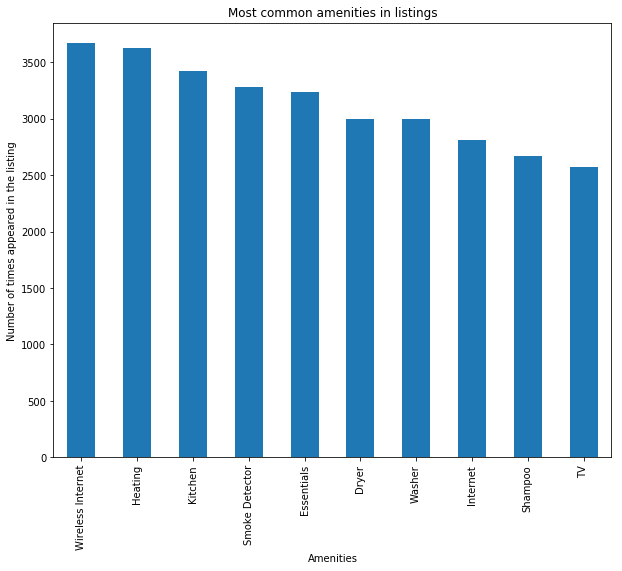

In [130]:
amenities_final.head(10).plot(kind='bar',figsize=(10,8))
plt.ylabel('Number of times appeared in the listing')
plt.xlabel('Amenities')
plt.title("Most common amenities in listings")
plt.show();

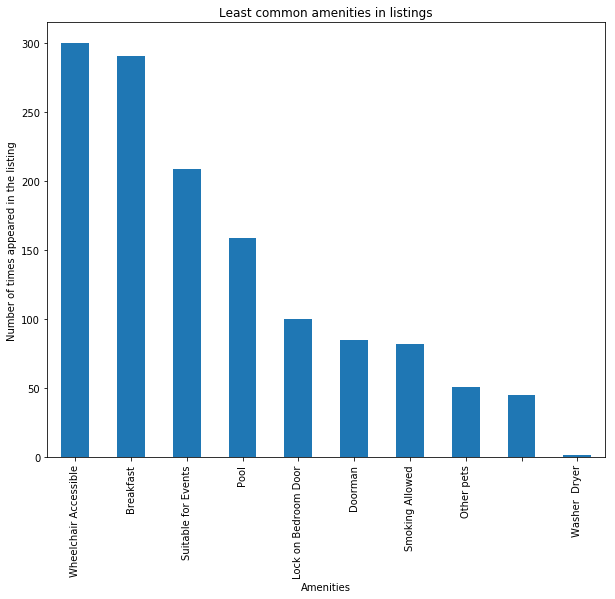

In [131]:
amenities_final.tail(10).plot(kind='bar',figsize=(10,8))
plt.ylabel('Number of times appeared in the listing')
plt.xlabel('Amenities')
plt.title("Least common amenities in listings")
plt.show();

In [132]:
# from the above visual, we can see that Wireless Internet,Heating,Kitchen,Smoke Detector,Essentials are the common amenities
# Lock on Bedroom Door,Doorman,Smoking Allowed,Other pets,Washer_Dryer are the least common amenities

In [133]:
# Conclusion
# 1.  What is the Airbnb price trend throughout the year?
#     Airbnb prices rise from January till July and then falls lower till November. 
#     we can see again some rise in the November to january. This might be due to holiday season. 

# 2.  What are the most available accomodation types?
#     Most available accomodation types in Seattle are House and Apartments. They occupy the major share of the accomodations.
      
# 3.  which neighborhood's are reviewed high by the customers and which are not popular?
#      Highly rated neighbourhoods
#       1. Riverview 
#       2. Southeast Magnolia
#       3. Harrison/Denny-Blaine
#       4. Madrona
#       5. Genesee
#
#       Low rated neighbourhoods
#        1. Pinehurst 
#        2. University District 
#        3. View Ridge
#        4. Ravenna
#        5. South Lake Union

# 4.  What are the most common amenities in the listings?
#      The most common amenities in listings are:
#        1. Wireless Internet
#        2. Heating
#        3. Kitchen
#        4. Smoke Detector
#        5. Essentials
# 
#      The least common amenities in listings are:
#        1. Washer_Dryer
#        2. Other pets
#        3. Smoking Allowed 
#        4. Doorman
#        5. Lock on Bedroom Door

